In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load the dataset
ehanced_train = pd.read_csv('data/balanced_train_data.csv')
training_data = pd.read_csv('data/train.csv')
training_data = pd.read_csv('data/train.csv')
validation_data = pd.read_csv('data/validation.csv')
test_data = pd.read_csv('data/test.csv')

In [5]:
# Step 2: Split the data into features and target
X_EnhancedTrain = ehanced_train.iloc[:, 1:-1]  # Features
y_EnhancedTrain = ehanced_train.iloc[:, -1]  # Target
X_train = training_data.iloc[:, 1:-1]  # Features
y_train = training_data.iloc[:, -1]  # Target
X_val = validation_data.iloc[:, 1:-1]  # Features
y_val = validation_data.iloc[:, -1]  # Target
X_test = test_data.iloc[:, 1:-1]  # Features
y_test = test_data.iloc[:, -1]  # Target

### Data normalization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Stacking

### The key idea here is to take best trained Deciscion Trees, Instanced-based Learning, Neural Networks, Bayesian Learning classifiers from early steaps and then stack them together using a meta-learner or a voting mechanism.

### Define these 4 classifiers with the best model parameters.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')
gnb = GaussianNB(var_smoothing=0.06604193962330306)
dc_best = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
mlp_clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8, 2),activation='logistic',batch_size=15,learning_rate_init=0.35,shuffle=True,alpha=0.01)

#### Then define the voting mechanism by using the `VotingClassifier` of scikit-learn.

In [8]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('nb', gnb), ('df', dc_best), ('mlp', mlp_clf)],
    voting='soft')
# setting voting to soft it predicts the class label based on the argmax of the sums of the predicted probabilities.

In [9]:
voting_clf.fit(X_train, y_train)

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=14,
                                                   weights='distance')),
                             ('nb',
                              GaussianNB(var_smoothing=0.06604193962330306)),
                             ('df',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=42)),
                             ('mlp',
                              MLPClassifier(activation='logistic', alpha=0.01,
                                            batch_size=15,
                                            hidden_layer_sizes=(8, 2),
                                            learning_rate_init=0.35,
                                            solver='lbfgs'))],
                 voting='soft')

### Fit each classifier individually to compare with the ensemble voting classifier

In [10]:
for clf in (knn_clf, gnb, dc_best, mlp_clf):
    clf.fit(X_train, y_train)

for clf in (knn_clf, gnb, dc_best, mlp_clf, voting_clf):
    print(clf.__class__.__name__)
    ys_pred = clf.predict(X_train)
    print('\ttrain:', accuracy_score(y_train, ys_pred))
    ys_pred = clf.predict(X_val)
    print('\tvalidation:', accuracy_score(y_val, ys_pred))

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


KNeighborsClassifier
	train: 0.9952771434502803
	validation: 0.7980140469847421
GaussianNB
	train: 0.7661926510276106
	validation: 0.7645919108743037
DecisionTreeClassifier
	train: 0.8164832883537472
	validation: 0.8137563574715427
MLPClassifier
	train: 0.8185073697321985
	validation: 0.8096391378057641
VotingClassifier
	train: 0.8686423084907618
	validation: 0.810365705982078


### There are no much hyper-parameter in VotingClassifier let run with voting parameter hard it uses the predicted class labels for a majority rule voting

In [11]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('nb', gnb), ('df', dc_best), ('mlp', mlp_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)
for clf in (knn_clf, gnb, dc_best, mlp_clf):
    clf.fit(X_train, y_train)

for clf in (knn_clf, gnb, dc_best, mlp_clf, voting_clf):
    print(clf.__class__.__name__)
    ys_pred = clf.predict(X_train)
    print('\ttrain:', accuracy_score(y_train, ys_pred))
    ys_pred = clf.predict(X_val)
    print('\tvalidation:', accuracy_score(y_val, ys_pred))

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


KNeighborsClassifier
	train: 0.9952771434502803
	validation: 0.7980140469847421
GaussianNB
	train: 0.7661926510276106
	validation: 0.7645919108743037
DecisionTreeClassifier
	train: 0.8164832883537472
	validation: 0.8137563574715427
MLPClassifier
	train: 0.8170022835789911
	validation: 0.8132719786873335
VotingClassifier
	train: 0.8307556570479552
	validation: 0.8091547590215549


#### For Bagging and Boosting we can only  pass one estimator to base_estimator and the main idea behind is to train one model on random samples of the training data in an attempt to reduce its variance. Therefore, we can actualy train 4 Bagging and Boosting for each classifier and pass into stacking classifier to get a final results.

#### Bagging ensemble method combines multiple independently trained models to reduce variance and improve stability. In bagging, multiple models are trained on different subsets of the training data using bootstrapping (sampling with replacement), and the final prediction is made by aggregating the predictions of all the models. Bagging can be used with any base model, and it works best when the base model is unstable or prone to overfitting. On the other hand, the Boosting ensemble method that combines multiple weak models to create a strong model, where the models are trained sequentially, and each subsequent model tries to correct the mistakes made by the previous models. Boosting is a technique that aims to reduce bias, and it is often used with decision trees.

#### Therefore, In our case Bagging ensemble method are more suitable for classifier train, we now implemented the bagging method for each classifier and pass all the bagging models to stacking to get an results.

In [12]:
# Bagging knn
from sklearn.ensemble import BaggingClassifier

bag_clf1 = BaggingClassifier(KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance'), max_samples=0.5, max_features=1.0)
bag_clf1.fit(X_train, y_train)

print(bag_clf1.__class__.__name__, '(kNN)')
ys_pred = bag_clf1.predict(X_train)
print('\ttrain:', accuracy_score(y_train, ys_pred))
ys_pred = bag_clf1.predict(X_val)
print('\tvalidation:', accuracy_score(y_val, ys_pred))

BaggingClassifier (kNN)
	train: 0.928378658916338
	validation: 0.7975296682005328


In [13]:
# Bagging naive bayesian
from sklearn.ensemble import BaggingClassifier

bag_clf2 = BaggingClassifier(GaussianNB(var_smoothing=0.06604193962330306), max_samples=0.5, max_features=1.0)
bag_clf2.fit(X_train, y_train)

print(bag_clf2.__class__.__name__, '(NB)')
ys_pred = bag_clf2.predict(X_train)
print('\ttrain:', accuracy_score(y_train, ys_pred))
ys_pred = bag_clf2.predict(X_val)
print('\tvalidation:', accuracy_score(y_val, ys_pred))

BaggingClassifier (NB)
	train: 0.7667635457753789
	validation: 0.7650762896585129


In [14]:
# Bagging decision tree
from sklearn.ensemble import BaggingClassifier

bag_clf3= BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42), max_samples=0.5, max_features=1.0)
bag_clf3.fit(X_train, y_train)

print(bag_clf3.__class__.__name__, '(DT)')
ys_pred = bag_clf3.predict(X_train)
print('\ttrain:', accuracy_score(y_train, ys_pred))
ys_pred = bag_clf3.predict(X_val)
print('\tvalidation:', accuracy_score(y_val, ys_pred))

BaggingClassifier (DT)
	train: 0.8145111064978202
	validation: 0.8171470089610076


In [15]:
# Bagging MLP
from sklearn.ensemble import BaggingClassifier

bag_clf4 = BaggingClassifier(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8, 2),activation='logistic',batch_size=15,learning_rate_init=0.35,shuffle=True,alpha=0.01), max_samples=0.5, max_features=1.0)
bag_clf4.fit(X_train, y_train)

print(bag_clf4.__class__.__name__, '(MLP)')
ys_pred = bag_clf4.predict(X_train)
print('\ttrain:', accuracy_score(y_train, ys_pred))
ys_pred = bag_clf4.predict(X_val)
print('\tvalidation:', accuracy_score(y_val, ys_pred))

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

BaggingClassifier (MLP)
	train: 0.8207909487232717
	validation: 0.8115766529426011


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Hyperparameter optimization - Bagging models for each four classifier (Random Search)

In [16]:
from sklearn.model_selection import RandomizedSearchCV

params={
    "n_estimators":[3,5,8,10,12,14],
    "max_samples":[0.1,0.2,0.3,0.5,0.7,0.9,1.0],
    "max_features":[0.1,0.3,0.5,0.7,0.9,1.0],
    }

estimator1 = BaggingClassifier(KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance'))
estimator2 = BaggingClassifier(GaussianNB(var_smoothing=0.06604193962330306))
estimator3= BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42))
estimator4 = BaggingClassifier(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8, 2),activation='logistic',batch_size=15,learning_rate_init=0.35,shuffle=True,alpha=0.01))

In [17]:
# Bagging Knn Hyper-parameter tun
BaggingClff1=RandomizedSearchCV(estimator=estimator1,param_distributions=params,n_iter=15,scoring='accuracy',cv=10,verbose=3)
BaggingClff1.fit(X_train, y_train)

best_stacking_model1 = BaggingClff1.best_estimator_
Y_pred = best_stacking_model1.predict(X_train)
print('\ttrain:', accuracy_score(y_train, Y_pred))
Y_pred = best_stacking_model1.predict(X_val)
print('\tvalidation:', accuracy_score(y_val, Y_pred))
BaggingClff1.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.801 total time=   0.2s
[CV 2/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.797 total time=   0.2s
[CV 3/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.807 total time=   0.2s
[CV 4/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.797 total time=   0.2s
[CV 5/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.800 total time=   0.2s
[CV 6/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.791 total time=   0.2s
[CV 7/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.800 total time=   0.2s
[CV 8/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.798 total time=   0.2s
[CV 9/10] END max_features=0.7, max_samples=0.2, n_estimators=3;, score=0.805 total time=   0.2s
[CV 10/10] END max_features=0.7, max_samples=0.2, n_estimators=3

{'n_estimators': 12, 'max_samples': 0.5, 'max_features': 0.9}

In [18]:
# Bagging NB Hyper-parameter tun
BaggingClff2=RandomizedSearchCV(estimator=estimator2,param_distributions=params,n_iter=15,scoring='accuracy',cv=10,verbose=3)
BaggingClff2.fit(X_train, y_train)

best_stacking_model2 = BaggingClff2.best_estimator_
Y_pred = best_stacking_model2.predict(X_train)
print('\ttrain:', accuracy_score(y_train, Y_pred))
Y_pred = best_stacking_model2.predict(X_val)
print('\tvalidation:', accuracy_score(y_val, Y_pred))
BaggingClff2.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.779 total time=   0.0s
[CV 2/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.759 total time=   0.0s
[CV 3/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.782 total time=   0.0s
[CV 4/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.785 total time=   0.0s
[CV 5/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.780 total time=   0.0s
[CV 6/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.768 total time=   0.1s
[CV 7/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.779 total time=   0.0s
[CV 8/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.793 total time=   0.0s
[CV 9/10] END max_features=0.7, max_samples=1.0, n_estimators=12;, score=0.786 total time=   0.0s
[CV 10/10] END max_features=0.7, max_samples=1.0, n_est

{'n_estimators': 14, 'max_samples': 0.9, 'max_features': 0.3}

In [19]:
# Bagging DecisionTree Hyper-parameter tun
BaggingClff3=RandomizedSearchCV(estimator=estimator3,param_distributions=params,n_iter=15,scoring='accuracy',cv=10,verbose=3)
BaggingClff3.fit(X_train, y_train)

best_stacking_model3 = BaggingClff3.best_estimator_
Y_pred = best_stacking_model3.predict(X_train)
print('\ttrain:', accuracy_score(y_train, Y_pred))
Y_pred = best_stacking_model3.predict(X_val)
print('\tvalidation:', accuracy_score(y_val, Y_pred))
BaggingClff3.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.813 total time=   0.1s
[CV 2/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.811 total time=   0.1s
[CV 3/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.814 total time=   0.1s
[CV 4/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.807 total time=   0.1s
[CV 5/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.806 total time=   0.1s
[CV 6/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.812 total time=   0.1s
[CV 7/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.814 total time=   0.1s
[CV 8/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.822 total time=   0.1s
[CV 9/10] END max_features=0.9, max_samples=0.9, n_estimators=3;, score=0.814 total time=   0.1s
[CV 10/10] END max_features=0.9, max_samples=0.9, n_estimators=3

{'n_estimators': 8, 'max_samples': 1.0, 'max_features': 1.0}

In [20]:
# Bagging MLP Hyper-parameter tun
BaggingClff4=RandomizedSearchCV(estimator=estimator4,param_distributions=params,n_iter=15,scoring='accuracy',cv=10,verbose=3)
BaggingClff4.fit(X_train, y_train)

best_stacking_model4 = BaggingClff4.best_estimator_
Y_pred = best_stacking_model4.predict(X_train)
print('\ttrain:', accuracy_score(y_train, Y_pred))
Y_pred = best_stacking_model4.predict(X_val)
print('\tvalidation:', accuracy_score(y_val, Y_pred))
BaggingClff4.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.804 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.810 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.808 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.799 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.802 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.794 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.803 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.808 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.801 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.5, max_samples=0.1, n_estimators=10;, score=0.812 total time=   0.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.807 total time=   3.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.816 total time=   3.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.814 total time=   3.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.798 total time=   3.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.809 total time=   3.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.805 total time=   3.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.805 total time=   3.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.809 total time=   3.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.825 total time=   3.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.9, max_samples=0.7, n_estimators=5;, score=0.821 total time=   3.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.793 total time=   5.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.788 total time=   5.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.803 total time=   5.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.796 total time=   5.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.794 total time=   5.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.782 total time=   5.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.801 total time=   5.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.800 total time=   5.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.801 total time=   5.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.3, max_samples=0.7, n_estimators=10;, score=0.812 total time=   5.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.774 total time=   2.9s
[CV 2/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.773 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.773 total time=   1.7s
[CV 4/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.773 total time=   1.4s
[CV 5/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.782 total time=   1.4s
[CV 6/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.773 total time=   2.2s
[CV 7/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.775 total time=   1.4s
[CV 8/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.773 total time=   2.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 9/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.774 total time=   2.0s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 10/10] END max_features=0.1, max_samples=1.0, n_estimators=5;, score=0.773 total time=   1.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.792 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.785 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.813 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.803 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.796 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 6/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.794 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.781 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.800 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.805 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.3, max_samples=0.5, n_estimators=3;, score=0.817 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.812 total time=   3.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.816 total time=   4.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.819 total time=   4.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.804 total time=   4.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.807 total time=   3.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.803 total time=   3.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.807 total time=   3.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.816 total time=   3.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.820 total time=   3.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.9, max_samples=0.2, n_estimators=12;, score=0.823 total time=   3.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.792 total time=   1.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.804 total time=   1.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.799 total time=   1.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.804 total time=   1.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.797 total time=   1.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.789 total time=   1.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.796 total time=   1.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.801 total time=   1.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.799 total time=   1.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.3, max_samples=0.2, n_estimators=12;, score=0.795 total time=   1.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.811 total time=   8.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.803 total time=   7.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.815 total time=   8.0s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.809 total time=   7.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.809 total time=   8.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.800 total time=   8.1s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.805 total time=   7.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.809 total time=   7.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.807 total time=   7.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.5, max_samples=0.7, n_estimators=12;, score=0.808 total time=   7.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.801 total time=   7.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.806 total time=   7.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.816 total time=   7.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.802 total time=   7.0s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.796 total time=   7.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.803 total time=   7.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.810 total time=   8.1s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.820 total time=   7.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.807 total time=   7.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.5, max_samples=0.9, n_estimators=10;, score=0.825 total time=   8.0s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.796 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.802 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.805 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.790 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.790 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.789 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.799 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.792 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.804 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.3, max_samples=0.1, n_estimators=12;, score=0.804 total time=   0.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.793 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.806 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.793 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.788 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.800 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.796 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.805 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.817 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.783 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.3, max_samples=0.1, n_estimators=5;, score=0.781 total time=   0.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.807 total time=   4.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.791 total time=   4.1s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.802 total time=   4.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.787 total time=   4.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.806 total time=   4.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.789 total time=   4.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.792 total time=   4.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.805 total time=   4.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.804 total time=   4.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.3, max_samples=1.0, n_estimators=5;, score=0.806 total time=   4.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.799 total time=   1.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.814 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.814 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.803 total time=   1.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.804 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.804 total time=   1.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.799 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.807 total time=   1.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.812 total time=   1.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.9, max_samples=0.1, n_estimators=8;, score=0.823 total time=   1.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.792 total time=   7.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.791 total time=   7.0s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.795 total time=   7.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.790 total time=   7.1s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.796 total time=   7.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.791 total time=   7.2s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.799 total time=   6.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.800 total time=   7.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.808 total time=   7.3s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=0.3, max_samples=1.0, n_estimators=8;, score=0.815 total time=   6.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 1/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.813 total time=   7.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 2/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.813 total time=   7.4s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 3/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.815 total time=   7.9s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 4/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.803 total time=   7.8s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 5/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.813 total time=   7.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 6/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.805 total time=   7.6s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 7/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.811 total time=   7.7s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 8/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.820 total time=   7.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 9/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.824 total time=   7.5s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV 10/10] END max_features=1.0, max_samples=0.7, n_estimators=10;, score=0.826 total time=   8.0s


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

	train: 0.820427652065601
	validation: 0.8139985468636474


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'n_estimators': 10, 'max_samples': 0.7, 'max_features': 1.0}

#### Let now stack the four bagging classifier

In [21]:
from sklearn.ensemble import VotingClassifier

#soft voting
SoftVoting_clf = VotingClassifier(
    estimators=[('BaggingKNN', best_stacking_model1), ('BaggingNB', best_stacking_model2), ('BaggingDF', best_stacking_model3), ('BaggingMLP', best_stacking_model4)],
    voting='soft')

SoftVoting_clf.fit(X_train, y_train)
for clf in (best_stacking_model1, best_stacking_model2, best_stacking_model3, best_stacking_model4):
    clf.fit(X_train, y_train)

for clf in (best_stacking_model1, best_stacking_model2, best_stacking_model3, best_stacking_model4, SoftVoting_clf):
    print(clf.__class__.__name__)
    ys_pred = clf.predict(X_train)
    print('\ttrain:', accuracy_score(y_train, ys_pred))
    ys_pred = clf.predict(X_val)
    print('\tvalidation:', accuracy_score(y_val, ys_pred))

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

BaggingClassifier
	train: 0.9298837450695454
	validation: 0.8043109711794624
BaggingClassifier
	train: 0.8004463358937097
	validation: 0.8018890772584161
BaggingClassifier
	train: 0.8161718912186008
	validation: 0.8188423347057399
BaggingClassifier
	train: 0.8212580444259913
	validation: 0.8159360620004844
VotingClassifier
	train: 0.8357380112102969
	validation: 0.8130297892952288


In [22]:
#hard voting
HardVoting_clf = VotingClassifier(
    estimators=[('BaggingKNN', best_stacking_model1), ('BaggingNB', best_stacking_model2), ('BaggingDF', best_stacking_model3), ('BaggingMLP', best_stacking_model4)],
    voting='hard')
HardVoting_clf.fit(X_train, y_train)
for clf in (best_stacking_model1, best_stacking_model2, best_stacking_model3, best_stacking_model4):
    clf.fit(X_train, y_train)

for clf in (best_stacking_model1, best_stacking_model2, best_stacking_model3, best_stacking_model4, HardVoting_clf):
    print(clf.__class__.__name__)
    ys_pred = clf.predict(X_train)
    print('\ttrain:', accuracy_score(y_train, ys_pred))
    ys_pred = clf.predict(X_val)
    print('\tvalidation:', accuracy_score(y_val, ys_pred))

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

BaggingClassifier
	train: 0.9318559269254723
	validation: 0.8014046984742068
BaggingClassifier
	train: 0.7967614697944779
	validation: 0.7989828045531606
BaggingClassifier
	train: 0.8167946854888936
	validation: 0.816178251392589
BaggingClassifier
	train: 0.8203757525430766
	validation: 0.812303221118915
VotingClassifier
	train: 0.8318455470209674
	validation: 0.8101235165899734


In [23]:
# Evaluate the accuracy on test_data with hard voting
y_test_pred = HardVoting_clf.predict(X_test)
test_accuracy_default = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with hyperparameter tuning: {test_accuracy_default}")

Test accuracy with hyperparameter tuning: 0.8174334140435835


Accuracy: 0.8174
Precision-score : 0.8989
Recall-Score : 0.8174
F1-Score: 0.8456
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      3709
         1.0       0.32      0.73      0.45       421

    accuracy                           0.82      4130
   macro avg       0.64      0.78      0.67      4130
weighted avg       0.90      0.82      0.85      4130

Confusion matrix

 [[3069  640]
 [ 114  307]]

True Positives(TP) =  3069

True Negatives(TN) =  307

False Positives(FP) =  640

False Negatives(FN) =  114


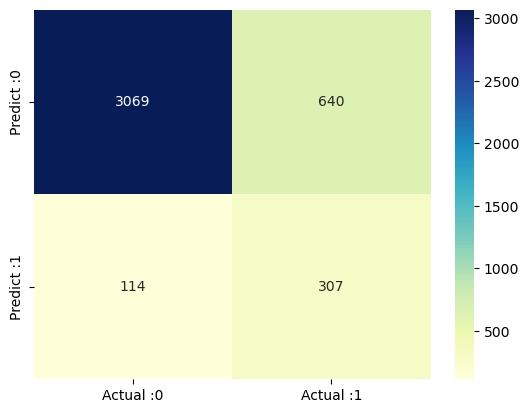

In [24]:
print('Accuracy: {0:0.4f}'.format(accuracy_score( y_test_pred, y_test)))
print("Precision-score :",
        round(precision_score(y_test_pred, y_test, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_test_pred, y_test, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_test_pred, y_test, average='weighted'), 4))

print(classification_report(y_test_pred, y_test))

# Print confusion matrix of the model
cm = confusion_matrix(y_test_pred, y_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show() 

In [25]:
# Evaluate the accuracy on test_data with soft vorting
y_test_pred = SoftVoting_clf.predict(X_test)
test_accuracy_default = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with hyperparameter tuning: {test_accuracy_default}")

Test accuracy with hyperparameter tuning: 0.8203389830508474


Accuracy: 0.8203
Precision-score : 0.8839
Recall-Score : 0.8203
F1-Score: 0.8424
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      3633
         1.0       0.37      0.71      0.49       497

    accuracy                           0.82      4130
   macro avg       0.66      0.77      0.69      4130
weighted avg       0.88      0.82      0.84      4130

Confusion matrix

 [[3037  596]
 [ 146  351]]

True Positives(TP) =  3037

True Negatives(TN) =  351

False Positives(FP) =  596

False Negatives(FN) =  146


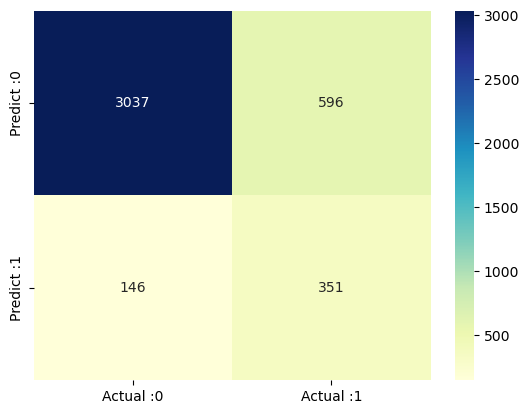

In [26]:
print('Accuracy: {0:0.4f}'.format(accuracy_score( y_test_pred, y_test)))
print("Precision-score :",
        round(precision_score(y_test_pred, y_test, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_test_pred, y_test, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_test_pred, y_test, average='weighted'), 4))

print(classification_report(y_test_pred, y_test))

# Print confusion matrix of the model
cm = confusion_matrix(y_test_pred, y_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show() 

### Try on Balanced dataset: and Examine on the performance for all model, note that the Balanced dataset is created by use some KNN sort of algorithm, where the new created dataset is not real, therefore the overall distribution of the original data may not accurate, so the performance might not as good as before but it gives some model focus to predict y=1 class.

In [27]:
from sklearn.ensemble import VotingClassifier

#soft voting
SoftVoting_clf2 = VotingClassifier(
    estimators=[('BaggingKNN', best_stacking_model1), ('BaggingNB', best_stacking_model2), ('BaggingDF', best_stacking_model3), ('BaggingMLP', best_stacking_model4)],
    voting='soft')

SoftVoting_clf2.fit(X_EnhancedTrain, y_EnhancedTrain)

for clf in (best_stacking_model1, best_stacking_model2, best_stacking_model3, best_stacking_model4, SoftVoting_clf):
    print(clf.__class__.__name__)
    ys_pred = clf.predict(X_EnhancedTrain)
    print('\ttrain:', accuracy_score(y_EnhancedTrain, ys_pred))
    ys_pred = clf.predict(X_val)
    print('\tvalidation:', accuracy_score(y_val, ys_pred))

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

BaggingClassifier
	train: 0.5703063629222309
	validation: 0.8014046984742068
BaggingClassifier
	train: 0.5396700706991359
	validation: 0.7989828045531606
BaggingClassifier
	train: 0.653717060629865
	validation: 0.816178251392589
BaggingClassifier
	train: 0.5324573305720203
	validation: 0.812303221118915
VotingClassifier


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/user

	train: 0.5368135399557238
	validation: 0.8130297892952288


In [28]:
# Evaluate the accuracy on test_data with soft vorting
y_test_pred = SoftVoting_clf2.predict(X_test)
test_accuracy_default = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with hyperparameter tuning: {test_accuracy_default}")

/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Test accuracy with hyperparameter tuning: 0.4046004842615012


/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/users/allenli/miniconda31/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.4046
Precision-score : 0.7191
Recall-Score : 0.4046
F1-Score: 0.4015
              precision    recall  f1-score   support

         0.0       0.27      0.87      0.41       988
         1.0       0.86      0.26      0.40      3142

    accuracy                           0.40      4130
   macro avg       0.56      0.56      0.40      4130
weighted avg       0.72      0.40      0.40      4130

Confusion matrix

 [[ 856  132]
 [2327  815]]

True Positives(TP) =  856

True Negatives(TN) =  815

False Positives(FP) =  132

False Negatives(FN) =  2327


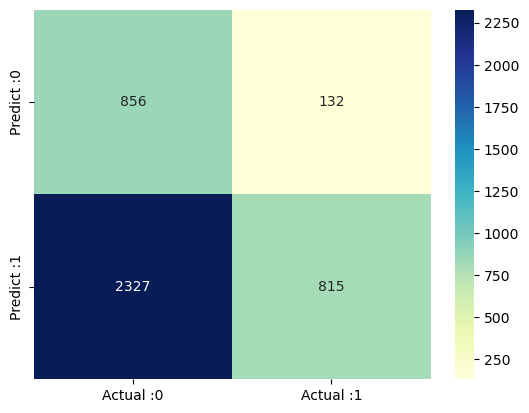

In [29]:
print('Accuracy: {0:0.4f}'.format(accuracy_score( y_test_pred, y_test)))
print("Precision-score :",
        round(precision_score(y_test_pred, y_test, average='weighted'), 4))
print("Recall-Score :",
        round(recall_score(y_test_pred, y_test, average='weighted'), 4))
print("F1-Score:", round(f1_score(y_test_pred, y_test, average='weighted'), 4))

print(classification_report(y_test_pred, y_test))

# Print confusion matrix of the model
cm = confusion_matrix(y_test_pred, y_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                            index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')  
plt.show() 